In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('csv/telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Payment method mana yang memiliki monthly charge terbesar per customer?

In [6]:
dfg = (
    df
    .groupby('PaymentMethod')['MonthlyCharges']
    .mean()
    .reset_index()
)
dfg

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


Text(0, 0.5, 'Rerata Monthly Charges')

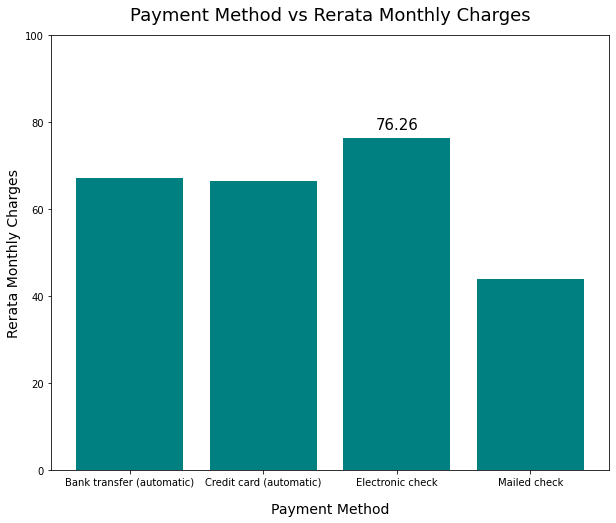

In [7]:
plt.figure(figsize=(10, 8))
plt.bar('PaymentMethod',
        'MonthlyCharges',
        data=dfg,
        color='teal')

plt.ylim(0, 100)
plt.text(x = 2, y = 78.26,
         s = "76.26", ha='center',
         fontsize=15)

plt.title('Payment Method vs Rerata Monthly Charges',
          fontsize=18, y=1.02)
plt.xlabel('Payment Method', fontsize=14, labelpad=15)
plt.ylabel('Rerata Monthly Charges', fontsize=14)

Terlihat bahwa Payment Method dengan rata-rata Monthly Charges terbesar yaitu Electronic check.

#### Bagaimana jumlah customer dilihat dari tenure group?

In [8]:
df['tenure_group'] = (
    np.where(df['tenure'] < 21,
             'low_tenure',
             np.where(df['tenure'] > 40, 
                      'high_tenure', 
                      'medium_tenure')
          )
)
display(df[['customerID',
            'tenure', 
            'tenure_group']
          ]
)

result = (
    df
    .groupby('tenure_group')['customerID']
    .nunique()
    .reset_index()
)
display(result)

,customerID,tenure,tenure_group
0,7590-VHVEG,1,low_tenure
1,5575-GNVDE,34,medium_tenure
2,3668-QPYBK,2,low_tenure
3,7795-CFOCW,45,high_tenure
4,9237-HQITU,2,low_tenure
...,...,...,...
7038,6840-RESVB,24,medium_tenure
7039,2234-XADUH,72,high_tenure
7040,4801-JZAZL,11,low_tenure
7041,8361-LTMKD,4,low_tenure


,tenure_group,customerID
0,high_tenure,2757
1,low_tenure,2878
2,medium_tenure,1408


Text(0, 0.5, '')

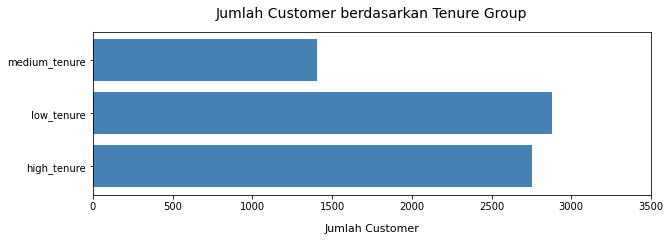

In [9]:
plt.figure(figsize=(10, 3))
plt.barh('tenure_group',
        'customerID',
        data=result,
        color='steelblue')

plt.xlim(0, 3500)
plt.title('Jumlah Customer berdasarkan Tenure Group',
          fontsize=14, y=1.05)
plt.xlabel('Jumlah Customer', fontsize=11, labelpad=12)
plt.ylabel('')

Terlihat bahwa jumlah customer terbanyak yaitu terdapat pada kelompok low tenure.

#### Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

In [10]:
dfg = (
    df
    .groupby(['SeniorCitizen', 'PhoneService'])
    .agg({'customerID':'nunique'})
    .reset_index()
)
dfg

,SeniorCitizen,PhoneService,customerID
0,0,No,578
1,0,Yes,5323
2,1,No,104
3,1,Yes,1038


Text(0.5, 1.0, 'Hubungan Senior Citizen dan Phone Service')

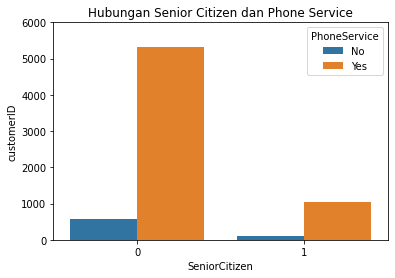

In [11]:
sns.barplot(x='SeniorCitizen',
            y='customerID',
            data=dfg,
            estimator=sum,
            hue='PhoneService')

plt.ylim(0, 6000)
plt.title('Hubungan Senior Citizen dan Phone Service')

Terlihat bahwa lebih banyak Senior Citizen yang berlangganan Phone Service.

#### Bagaimana Distribusi dari TotalCharge?

In [12]:
df['TotalCharges'] = (
    df['TotalCharges']
    .replace(' ', np.nan)
    .astype(float)
)
df['TotalCharges'].dtypes

dtype('float64')

In [13]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,low_tenure
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,low_tenure
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,low_tenure
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,low_tenure
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,low_tenure
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,low_tenure
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,low_tenure
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,low_tenure
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,low_tenure
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,low_tenure


Text(0.5, 1.0, 'Distribusi Total Charges')

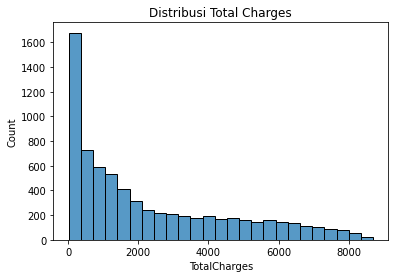

In [14]:
sns.histplot(x='TotalCharges', data=df)
plt.title('Distribusi Total Charges')

Terlihat  bahwa distribusi Total Charges dari customer termasuk ke dalam skewed right distribution yang mana jumlah costumer terdistribusi pada costumer dengan pengeluaran kecil.

#### Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

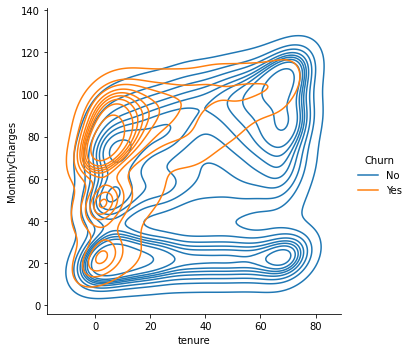

In [17]:
sns.displot(df,
            x='tenure',
            y='MonthlyCharges',
            hue='Churn',
            kind='kde')

(0.0, 140.0)

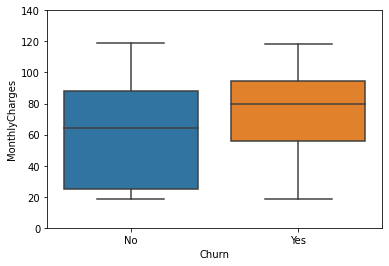

In [16]:
sns.boxplot(x='Churn',
            y='MonthlyCharges',
            data=df)
plt.ylim(0, 140)

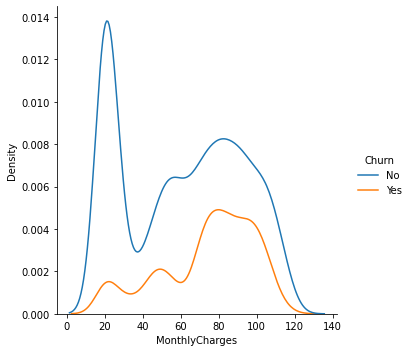

In [18]:
sns.displot(x='MonthlyCharges',
            data=df,
            hue='Churn',
            kind='kde')

Terlihat bahwa customer dengan Monthly Charges tinggi cenderung Churn.

#### Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

In [19]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure


In [20]:
dfg = (
    df
    .groupby(['Partner', 'Dependents'])
    ['customerID']
    .nunique()
    .reset_index()
)
dfg

,Partner,Dependents,customerID
0,No,No,3280
1,No,Yes,361
2,Yes,No,1653
3,Yes,Yes,1749


In [21]:
dfgp = (
    df
    .groupby('Partner')['Churn']
    .value_counts()/len(df)
)

dfgp = (
    dfgp
    .to_frame()
    .rename({'Churn': 'Rasio Pelanggan'}, 
            axis=1)
    .reset_index()
)
dfgp

,Partner,Churn,Rasio Pelanggan
0,No,No,0.346585
1,No,Yes,0.170382
2,Yes,No,0.388045
3,Yes,Yes,0.094988


In [22]:
dfgd = (
    df
    .groupby('Dependents')['Churn']
    .value_counts()/len(df)
)

dfgd = (
    dfgd
    .to_frame()
    .rename({'Churn': 'Rasio Pelanggan'}, 
            axis=1)
    .reset_index()
)
dfgd

,Dependents,Churn,Rasio Pelanggan
0,No,No,0.481329
1,No,Yes,0.219083
2,Yes,No,0.253301
3,Yes,Yes,0.046287


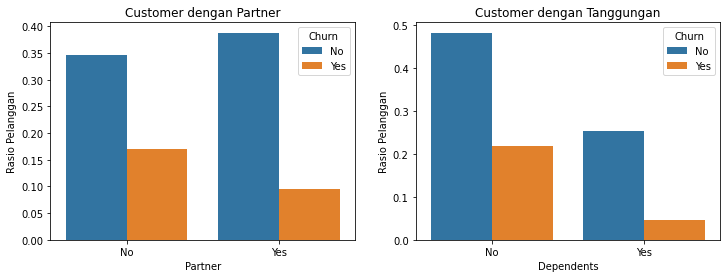

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))

axis[0].set_title('Customer dengan Partner')
axis[1].set_title('Customer dengan Tanggungan')

# Plot Partner
ax = (
    sns.barplot(x='Partner',
                y='Rasio Pelanggan',
                hue='Churn',
                data=dfgp,
                ax=axis[0]
               )
)

# Plot Dependent
ax = (
    sns.barplot(x='Dependents', 
                y= 'Rasio Pelanggan', 
                hue='Churn', 
                data=dfgd, 
                ax=axis[1]
               )
)

Terlihat bahwa customer yang tidak memiliki partner cenderung Churn dan customer yang tidak memiliki tanggungan juga cenderung Churn.

#### Insight dari dataset disertai dengan storyline yang memanfaatkan atribut PaymentMethod, customerID, dan Churn.

In [25]:
df[['PaymentMethod', 'customerID', 'Churn']].head()

,PaymentMethod,customerID,Churn
0,Electronic check,7590-VHVEG,No
1,Mailed check,5575-GNVDE,No
2,Mailed check,3668-QPYBK,Yes
3,Bank transfer (automatic),7795-CFOCW,No
4,Electronic check,9237-HQITU,Yes


In [26]:
dfg = (
    df
    .groupby(['PaymentMethod', 'Churn'])
    ['customerID']
    .nunique()
    .reset_index()
)
dfg

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


In [27]:
dfp = (
    dfg
    .pivot_table(index='PaymentMethod',
                 columns='Churn',
                 values='customerID')
)
dfp

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Text(-660, -1.2, 'Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn')

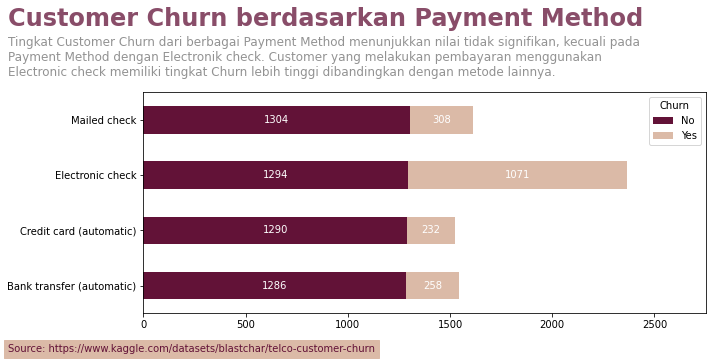

In [28]:
ax = (
    dfp
    .plot
    .barh(align='center',
          stacked=True,
          figsize=(10, 5),
          color=['#621237', '#dbbaa7']
         )
)

ax.text(x = -660, 
        y = 4.70, 
        s = 'Customer Churn berdasarkan '
        'Payment Method',
        fontsize = 24, 
        weight = 'bold', 
        alpha = .75,
        color = '#621237')
ax.text(x = -660, 
        y = 3.80,
        s = 'Tingkat Customer Churn dari berbagai '
        'Payment Method menunjukkan nilai tidak '
        'signifikan, kecuali pada\nPayment Method '
        'dengan Electronik check. Customer yang '
        'melakukan pembayaran menggunakan\n'
        'Electronic check memiliki '
        'tingkat Churn lebih tinggi dibandingkan '
        'dengan metode lainnya.',
        fontsize = 12, 
        alpha = .85, 
        color='gray')

ax.yaxis.label.set_visible(False)
plt.xlim(0, 2750)
plt.tight_layout()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,   
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white')

ax.text(x = -660, 
        y = -1.2,
        s = 'Source: https://www.kaggle.com/datasets'
        '/blastchar/telco-customer-churn',
        fontsize = 10,
        color='#621237',
        backgroundcolor = '#dbbaa7')